In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

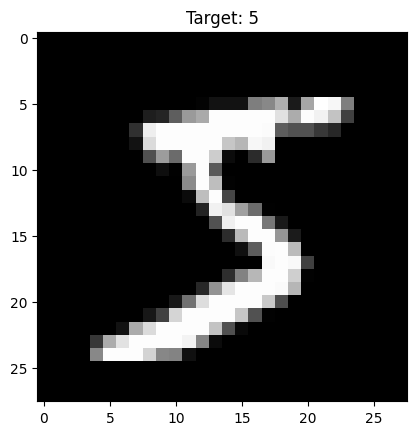

In [3]:
# Print a sample traning data
first_image = np.array(x_train[0], dtype='float')
plt.imshow(first_image, cmap='gray')
plt.title(f"Target: {y_train[0]}")
plt.show()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Rescaling(1.0 / 255),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])
model.compile(
    # https://www.coursera.org/learn/advanced-learning-algorithms/lecture/5Qt9E/advanced-optimization
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    # https://www.coursera.org/learn/advanced-learning-algorithms/lecture/ZQPG3/neural-network-with-softmax-output
    # https://www.coursera.org/learn/advanced-learning-algorithms/lecture/Tyil1/improved-implementation-of-softmax
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.3231
Epoch 2/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.1587
Epoch 3/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.1185
Epoch 4/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.0979
Epoch 5/5
1875/1875 [==============================] - 2s 989us/step - loss: 0.0826
313/313 - 0s - loss: 0.0853 - 245ms/epoch - 782us/step


0.08533209562301636

In [5]:
# Print Total / Error Counts
predicted = model(x_test)
total_count = predicted.shape[0]
error_index_list = list(filter(
    lambda i: np.argmax(predicted[i]) != y_test[i], 
    range(total_count)
))
print(f"total: {total_count}, error: {len(error_index_list)}")

total: 10000, error: 263


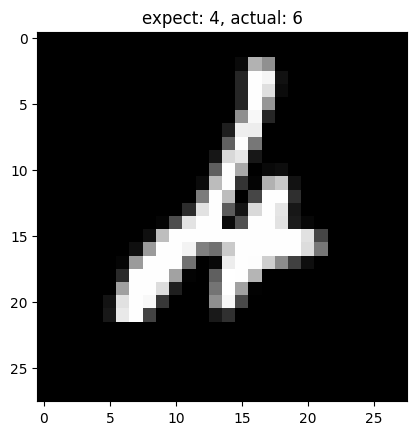

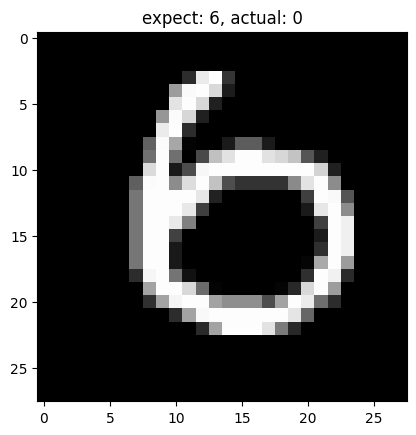

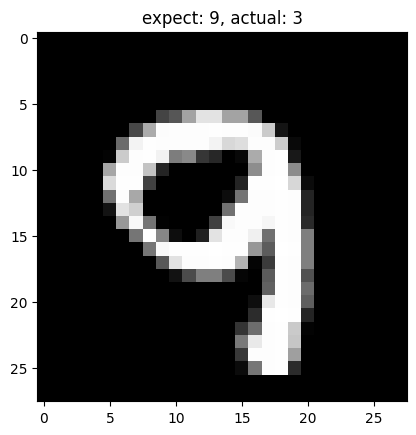

In [6]:
# Print Errors 
for index in error_index_list[0:3]: 
    first_image = np.array(x_test[index], dtype='float')
    plt.imshow(first_image, cmap='gray')
    plt.title(f"expect: {y_test[index]}, actual: {np.argmax(predicted[index])}")
    plt.show()